# This work is to change the model data to find the best work for this job
using 1 dimensional data to get the 2 dimensional data to fit the ConvLSTM model work  


# located at Google Drive

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
import os
os.chdir('/content/drive/My Drive/LSTM')
!ls

BSrf1000.mat				   IMG_ConvLSTM
ConvLSTM-fitting_Model_1dimensional.ipynb  LSTM.h5
ConvLSTM_little_predict.ipynb		   test1-analyse.ipynb
ConvLSTM-Using_Model_test.ipynb		   test1.ipynb
DATA					   test2_all.ipynb
DataProcess				   test2.ipynb
Different_Models_Score_Pic		   train2.csv
IMG					   train.csv


# head

In [0]:
import os
import csv
import numpy
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat
from pandas import read_csv
from keras.models import Sequential
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM


# Directing reading the csv data, not using the mat file

In [0]:
dataframe = read_csv('train.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values

## show the plot to see whether the file is right
OK, it is right    
now I can comment it

In [0]:
# plt.plot(dataset)
# plt.show()

## dealing the dataframe to get the needing data
very original way to get rid of the [[]] and get the list    
the df is a list of:
[[49]
[49]
[50]] this kind of data, so we need to change it to what we want   
now we can get the list: new_df is a only number's list


In [22]:
df = dataset.tolist()
new_df = eval('[%s]'%repr(df).replace('[', '').replace(']', ''))
print(new_df)

[49, 49, 50, 49, 50, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 50, 50, 51, 50, 51, 50, 50, 50, 50, 50, 50, 51, 51, 52, 52, 52, 52, 52, 52, 52, 51, 51, 50, 51, 50, 50, 50, 49, 50, 49, 50, 50, 50, 50, 50, 49, 50, 50, 49, 50, 49, 50, 49, 49, 49, 49, 48, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 50, 51, 50, 50, 51, 51, 51, 51, 51, 51, 51, 52, 51, 51, 51, 51, 51, 50, 50, 51, 51, 51, 51, 50, 51, 51, 50, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 50, 49, 50, 50, 50, 49, 50, 50, 49, 49, 49, 48, 49, 48, 48, 48, 48, 48, 47, 47, 46, 46, 45, 45, 44, 44, 44, 44, 43, 44, 43, 43, 43, 43, 42, 42, 42, 43, 43, 43, 42, 43, 42, 42, 42, 42, 42, 42, 42, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 44, 45, 45, 45, 46, 46, 47, 47, 48, 47, 48, 48, 49, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 49, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 51, 53, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54, 54, 54, 54, 53, 54, 53,

# now we can use the ConvLSTM model to predict the data    
This block is using to get the ConvLSTM Model      
The predict model is next of it

In [48]:
# this model unique head file, loading it
# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
import datetime

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = new_df
# choose a number of time steps
n_steps = 4
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
n_features = 1
n_seq = 2
n_steps = 2
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))
# calculate the running time
start = datetime.datetime.now()

# define model
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=500, verbose=0)
# demonstrate prediction

# end time and total time
end = datetime.datetime.now()
print(end - start)

0:01:04.666341


# predict and plot
this block is using to get the predict data and get the plot pictures
do not have the 

In [49]:
import datetime
print(len(new_df))
now = int(len(new_df) * 0.67)
print(now)
# list_test为预测的数组数据
list_test = []
start = datetime.datetime.now()

while(now != len(new_df)-1):
  x_input = array(new_df[now-4:now])
  x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))
  yhat = model.predict(x_input, verbose=0)
  predict_num = float(yhat)
  list_test.append(predict_num)
  print(predict_num)
  now = now + 1

end = datetime.datetime.now()
print(end - start)
print(list_test)

355
237
52.96775817871094
52.96775817871094
52.96775817871094
52.96775817871094
52.96775817871094
52.96775817871094
53.253292083740234
53.58662414550781
53.999427795410156
54.0084114074707
54.0084114074707
53.72208023071289
53.66081619262695
53.38106155395508
53.651641845703125
53.667213439941406
53.999427795410156
54.0084114074707
53.72208023071289
53.66081619262695
53.38106155395508
53.651641845703125
53.667213439941406
53.712890625
53.375240325927734
53.03458786010742
52.68275833129883
52.33797073364258
51.715309143066406
51.341121673583984
50.682647705078125
50.345672607421875
49.67313766479492
49.07019805908203
48.623626708984375
48.30436325073242
48.3587760925293
47.689517974853516
47.3585319519043
46.69753646850586
46.36263656616211
45.705474853515625
45.642005920410156
45.31850051879883
45.353511810302734
44.9879150390625
44.974544525146484
44.69974899291992
44.64475631713867
44.59769058227539
44.955997467041016
44.69974899291992
44.3707160949707
43.994483947753906
43.701808929

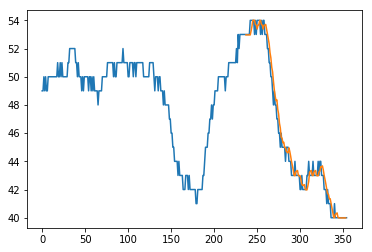

In [56]:
plt.plot(new_df)
x = range(int(len(new_df) * 0.67), len(new_df) - 1)
plt.plot(x, list_test)
os.chdir("/content/drive/My Drive/LSTM/IMG_ConvLSTM")
plt.savefig("BaseStationnum0-0-0.67_n_step4.jpg")
os.chdir("/content/drive/My Drive/LSTM")